In [3]:
%matplotlib inline
import pandas as pd

In [4]:
!head -n 10 pydata-book/ch02/names/yob1880.txt

In [5]:
names1880 = pd.read_csv('pydata-book/ch02/names/yob1880.txt', names=['name', 'sex', 'births'])

In [6]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [7]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [13]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'pydata-book/ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)

In [14]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [15]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [16]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


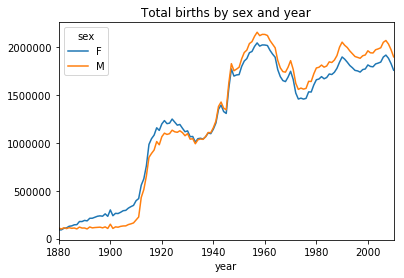

In [17]:
total_births.plot(title='Total births by sex and year')

In [20]:
def add_prop(group):
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [31]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [32]:
import numpy as np

In [33]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [36]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [37]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [38]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [39]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000_new = pd.concat(pieces, ignore_index=True)

In [40]:
top1000_new

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [41]:
boys = top1000[top1000.sex == 'M']

In [42]:
girls = top1000[top1000.sex == 'F']

In [43]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [44]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [45]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119815d68>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12415c390>], dtype=object)

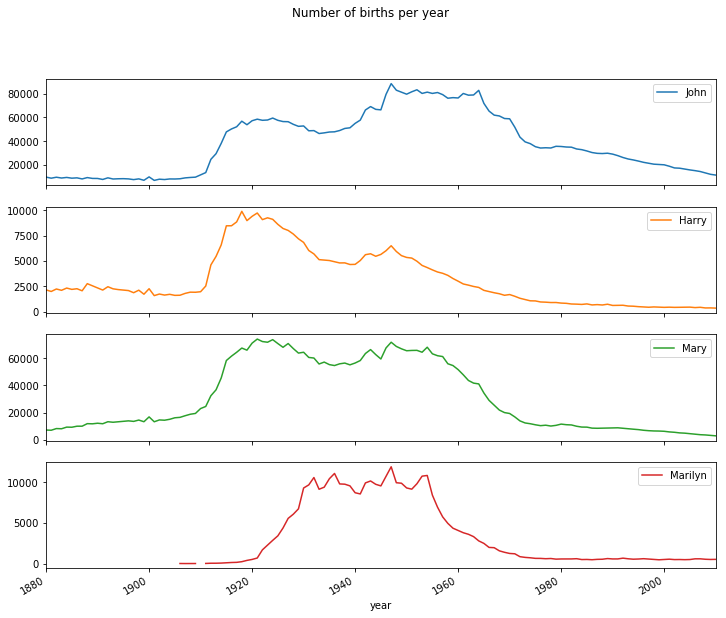

In [46]:
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

In [47]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

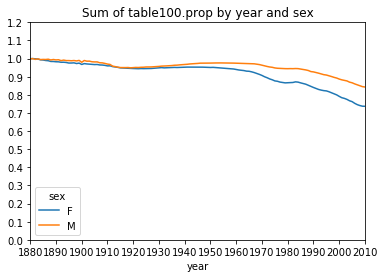

In [48]:
table.plot(title='Sum of table100.prop by year and sex', yticks=np.linspace(0, 1.2,13), xticks=range(1880, 2020, 10))

In [49]:
df = boys[boys.year == 2010]

In [50]:
df

name sex  births  year      prop
year sex                                                 
2010 M   1676644        Jacob   M   21875  2010  0.011523
         1676645        Ethan   M   17866  2010  0.009411
         1676646      Michael   M   17133  2010  0.009025
         1676647       Jayden   M   17030  2010  0.008971
         1676648      William   M   16870  2010  0.008887
         1676649    Alexander   M   16634  2010  0.008762
         1676650         Noah   M   16281  2010  0.008576
         1676651       Daniel   M   15679  2010  0.008259
         1676652        Aiden   M   15403  2010  0.008114
         1676653      Anthony   M   15364  2010  0.008093
         1676654       Joshua   M   15238  2010  0.008027
         1676655        Mason   M   14728  2010  0.007758
         1676656  Christopher   M   14135  2010  0.007446
         1676657       Andrew   M   14093  2010  0.007424
         1676658        David   M   14042  2010  0.007397
         1676659      Matthew   M   13954  2010  0.007350
         1676660        Logan   M   13943  2010  0.007345
         1676661       Elijah   M   13735  2010  0.007235
         1676662        James   M   13714  2010  0.007224
         1676663       Joseph   M   13657  2010  0.007194
         1676664      Gabriel   M   12722  2010  0.006701
         1676665     Benjamin   M   12280  2010  0.006469
         1676666         Ryan   M   11886  2010  0.006261
         1676667       Samuel   M   11776  2010  0.006203
         1676668      Jackson   M   11693  2010  0.006159
         1676669         John   M   11424  2010  0.006018
         1676670       Nathan   M   11269  2010  0.005936
         1676671     Jonathan   M   11028  2010  0.005809
         1676672    Christian   M   10965  2010  0.005776
         1676673         Liam   M   10852  2010  0.005716
...                       ...  ..     ...   ...       ...
         1677617         Yair   M     201  2010  0.000106
         1677616        Talan   M     201  2010  0.000106
         1677614        Keyon   M     201  2010  0.000106
         1677613         Kael   M     201  2010  0.000106
         1677618     Demarion   M     200  2010  0.000105
         1677619       Gibson   M     200  2010  0.000105
         1677620       Reagan   M     200  2010  0.000105
         1677621    Cristofer   M     199  2010  0.000105
         1677622       Daylen   M     199  2010  0.000105
         1677623       Jordon   M     199  2010  0.000105
         1677624      Dashawn   M     198  2010  0.000104
         1677625        Masen   M     198  2010  0.000104
         1677629        Rowen   M     197  2010  0.000104
         1677631       Yousef   M     197  2010  0.000104
         1677630     Thaddeus   M     197  2010  0.000104
         1677628        Kadin   M     197  2010  0.000104
         1677627       Dillan   M     197  2010  0.000104
         1677626     Clarence   M     197  2010  0.000104
         1677634        Slade   M     196  2010  0.000103
         1677632      Clinton   M     196  2010  0.000103
         1677633      Sheldon   M     196  2010  0.000103
         1677636      Keshawn   M     195  2010  0.000103
         1677637     Menachem   M     195  2010  0.000103
         1677635       Joziah   M     195  2010  0.000103
         1677638       Bailey   M     194  2010  0.000102
         1677639       Camilo   M     194  2010  0.000102
         1677640       Destin   M     194  2010  0.000102
         1677641       Jaquan   M     194  2010  0.000102
         1677642       Jaydan   M     194  2010  0.000102
         1677645       Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]

In [57]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [58]:
prop_cumsum[:10]

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
Name: prop, dtype: float64

In [86]:
prop_cumsum.searchsorted(0.5).item() + 1

117

In [83]:
test.item()

116

In [66]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

array([25])

In [87]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q).item() + 1

In [88]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

In [69]:
diversity

year  sex
1880  F       [38]
      M       [14]
1881  F       [38]
      M       [14]
1882  F       [38]
      M       [15]
1883  F       [39]
      M       [15]
1884  F       [39]
      M       [16]
1885  F       [40]
      M       [16]
1886  F       [41]
      M       [16]
1887  F       [41]
      M       [17]
1888  F       [42]
      M       [17]
1889  F       [43]
      M       [18]
1890  F       [44]
      M       [19]
1891  F       [44]
      M       [20]
1892  F       [44]
      M       [20]
1893  F       [44]
      M       [21]
1894  F       [45]
      M       [22]
             ...  
1996  F      [122]
      M       [64]
1997  F      [129]
      M       [67]
1998  F      [138]
      M       [70]
1999  F      [146]
      M       [73]
2000  F      [155]
      M       [77]
2001  F      [164]
      M       [81]
2002  F      [170]
      M       [83]
2003  F      [178]
      M       [87]
2004  F      [191]
      M       [92]
2005  F      [199]
      M       [96]
2006  F      [209]
  

In [93]:
diversity = diversity.unstack('sex')

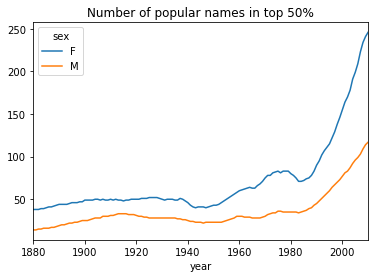

In [94]:
diversity.plot(title="Number of popular names in top 50%")

In [95]:
get_last_letter = lambda x: x[-1]

In [96]:
last_letters = names.name.map(get_last_letter)

In [97]:
last_letters

0          y
1          a
2          a
3          h
4          e
5          t
6          a
7          e
8          a
9          h
10         e
11         a
12         a
13         e
14         a
15         a
16         a
17         e
18         e
19         e
20         e
21         l
22         e
23         e
24         e
25         a
26         e
27         h
28         e
29         e
          ..
1690754    n
1690755    n
1690756    n
1690757    n
1690758    l
1690759    n
1690760    a
1690761    o
1690762    h
1690763    i
1690764    h
1690765    n
1690766    r
1690767    n
1690768    n
1690769    n
1690770    n
1690771    i
1690772    n
1690773    b
1690774    e
1690775    t
1690776    n
1690777    r
1690778    n
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, dtype: object

In [98]:
last_letters.name = 'last_letter'

In [99]:
last_letters

0          y
1          a
2          a
3          h
4          e
5          t
6          a
7          e
8          a
9          h
10         e
11         a
12         a
13         e
14         a
15         a
16         a
17         e
18         e
19         e
20         e
21         l
22         e
23         e
24         e
25         a
26         e
27         h
28         e
29         e
          ..
1690754    n
1690755    n
1690756    n
1690757    n
1690758    l
1690759    n
1690760    a
1690761    o
1690762    h
1690763    i
1690764    h
1690765    n
1690766    r
1690767    n
1690768    n
1690769    n
1690770    n
1690771    i
1690772    n
1690773    b
1690774    e
1690775    t
1690776    n
1690777    r
1690778    n
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, dtype: object

In [104]:
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [105]:
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   
f                NaN      NaN      NaN    ...       1758.0    1817.0   
g               25.0     44.0     28.0    ...       2151.0    2084.0   
h             7141.0   8630.0   8826.0    ...      85959.0   88085.0   
i              105.0    141.0    134.0    ...      20980.0   23610.0   
j                NaN      NaN      NaN    ...       1069.0    1088.0   
k               19.0     21.0     22.0    ...      42477.0   42043.0   
l             6175.0   7900.0   8395.0    ...     153648.0  153493.0   
m               90.0    123.0    137.0    ...      41967.0   42663.0   
n             5512.0   6833.0   7103.0    ...     616099.0  630322.0   
o               97.0    134.0    142.0    ...      82146.0   83180.0   
p                NaN      NaN      NaN    ...       3419.0    3157.0   
q                NaN      NaN      NaN    ...        602.0     618.0   
r              910.0   1207.0   1214.0    ...     165377.0  164821.0   
s             2803.0   3582.0   3569.0    ...     143791.0  139595.0   
t             3140.0   3816.0   3784.0    ...      47688.0   44991.0   
u              476.0    541.0    469.0    ...       1833.0    1819.0   
v        

In [106]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [107]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [108]:
letter_prop = subtable / subtable.sum().astype(float)

In [109]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

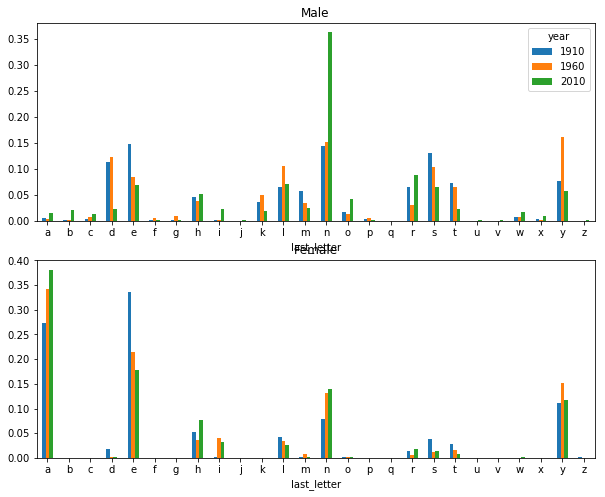

In [112]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1, figsize=(10,8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [113]:
letter_prop = table / table.sum().astype(float)

In [114]:
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T

In [115]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


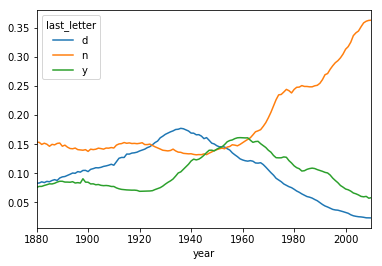

In [116]:
dny_ts.plot()

In [117]:
all_names = top1000.name.unique()

In [118]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [120]:
lesley_like = all_names[mask]

In [121]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [122]:
mask

array([False, False, False, ..., False, False, False], dtype=bool)

In [123]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [125]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [136]:
filtered

name sex  births  year      prop
year sex                                            
1880 F   654      Leslie   F       8  1880  0.000088
     M   1108     Leslie   M      79  1880  0.000715
1881 F   2523     Leslie   F      11  1881  0.000120
     M   3072     Leslie   M      92  1881  0.000913
1882 F   4593     Leslie   F       9  1882  0.000083
     M   5081     Leslie   M     122  1882  0.001073
         5865     Lesley   M       6  1882  0.000053
1883 F   6850     Leslie   F       7  1883  0.000062
     M   7225     Leslie   M     120  1883  0.001147
         8093     Lesley   M       5  1883  0.000048
1884 F   8697     Leslie   F      15  1884  0.000116
     M   9432     Leslie   M     125  1884  0.001092
1885 F   11161    Leslie   F      10  1885  0.000075
     M   11751    Leslie   M     122  1885  0.001132
1886 F   13601    Leslie   F       8  1886  0.000055
     M   14132    Leslie   M     136  1886  0.001228
1887 F   15806    Leslie   F      12  1887  0.000082
     M   16524    Leslie   M     166  1887  0.001637
1888 F   18030    Leslie   F      23  1888  0.000129
     M   19074    Leslie   M     175  1888  0.001448
1889 F   20690    Leslie   F      23  1889  0.000129
     M   21737    Leslie   M     155  1889  0.001402
1890 F   23332    Leslie   F      20  1890  0.000105
     M   24372    Leslie   M     181  1890  0.001630
1891 F   25928    Leslie   F      28  1891  0.000151
     M   27068    Leslie   M     164  1891  0.001621
1892 F   28704    Leslie   F      22  1892  0.000104
     M   29851    Leslie   M     207  1892  0.001696
1893 F   31576    Leslie   F      26  1893  0.000122
     M   32765    Leslie   M     185  1893  0.001647
...                  ...  ..     ...   ...       ...
2000 F   1332261  Leslie   F    3619  2000  0.001995
         1332560   Lesly   F     742  2000  0.000409
         1332601  Lesley   F     658  2000  0.000363
2001 F   1362012  Leslie   F    3610  2001  0.002007
         1362300   Lesly   F     801  2001  0.000445
         1362452  Lesley   F     509  2001  0.000283
2002 F   1392272  Leslie   F    3520  2002  0.001962
         1392586   Lesly   F     717  2002  0.000400
         1392743  Lesley   F     471  2002  0.000262
2003 F   1422818  Leslie   F    3635  2003  0.001992
         1423091   Lesly   F     838  2003  0.000459
         1423330  Lesley   F     451  2003  0.000247
2004 F   1453982  Leslie   F    3497  2004  0.001908
         1454295   Lesly   F     747  2004  0.000408
         1454500  Lesley   F     450  2004  0.000245
2005 F   1486010  Leslie   F    3120  2005  0.001692
         1486308   Lesly   F     783  2005  0.000425
         1486623  Lesley   F     381  2005  0.000207
2006 F   1518523  Leslie   F    3035  2006  0.001600
         1518834   Lesly   F     761  2006  0.000401
         1519161  Lesley   F     370  2006  0.000195
2007 F   1552581  Leslie   F    2689  2007  0.001403
         1552882   Lesly   F     765  2007  0.000399
         1553271  Lesley   F     351  2007  0.000183
2008 F   1587484  Leslie   F    2323  2008  0.001233
         1587788   Lesly   F     699  2008  0.000371
2009 F   1622503  Leslie   F    1975  2009  0.001081
         1622845   Lesly   F     598  2009  0.000327
2010 F   1657142  Leslie   F    1558  2010  0.000886
         1657525   Lesly   F     502  2010  0.000285

[400 rows x 5 columns]

In [129]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [130]:
table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
1885,10.0,122.0
1886,8.0,136.0
1887,12.0,166.0
1888,23.0,175.0


In [131]:
table = table.div(table.sum(1), axis=0)

In [133]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


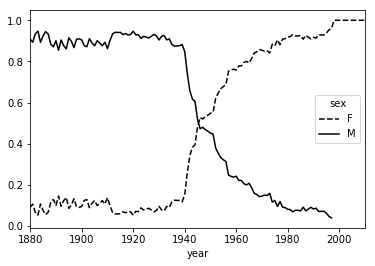

In [135]:
table.plot(style={'M': 'k-', 'F': 'k--'})